<a href="https://colab.research.google.com/github/Saurav1934/Main-Flow-3/blob/main/Main_Flow_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd

In [2]:
df = pd.read_csv("Mall_Customers.csv")
display(df.head())

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000     

In [4]:
df = df.drop(columns=['CustomerID', 'Genre'], errors='ignore')

In [5]:
# Select the relevant features
features = ['Age', 'Annual_Income_(k$)', 'Spending_Score']

In [6]:
# Instantiate StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the selected features
scaler.fit(df[features])

StandardScaler()

In [7]:
# Transform the selected features
df_scaled = pd.DataFrame(scaler.transform(df[features]), columns=features)
display(df_scaled.head())
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

,Age,Annual_Income_(k$),Spending_Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [8]:
# Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Indented this line
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

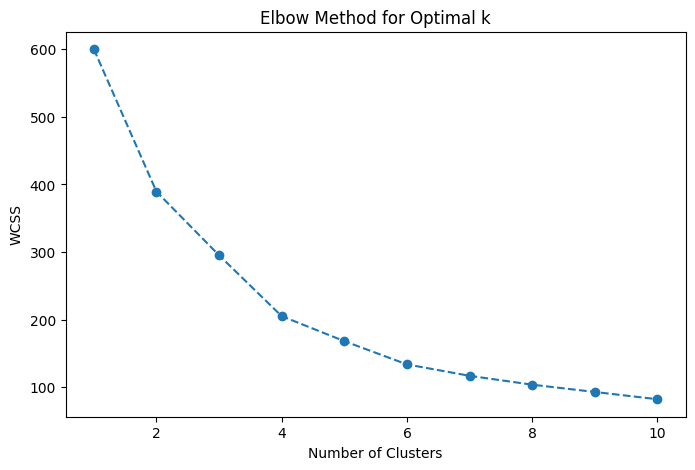

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
# Silhouette Analysis
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f'For k = {k}, Silhouette Score = {score}')

For k = 2, Silhouette Score = 0.33547192894004574
For k = 3, Silhouette Score = 0.357793388710272
For k = 4, Silhouette Score = 0.4039582785148566
For k = 5, Silhouette Score = 0.41664341513732767
For k = 6, Silhouette Score = 0.4284167762892593
For k = 7, Silhouette Score = 0.417231894954916
For k = 8, Silhouette Score = 0.4082067042807375
For k = 9, Silhouette Score = 0.41769250624076476
For k = 10, Silhouette Score = 0.40655411010117015


In [11]:
optimal_k = 5 # Replace with the visually determined optimal k
from sklearn.cluster import KMeans
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)
display(df.head())

,Age,Annual_Income_(k$),Spending_Score,Cluster
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,1


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
display(df.head())

,Age,Annual_Income_(k$),Spending_Score,Cluster,PCA1,PCA2
0,19,15,39,1,-0.615720,-1.763481
1,21,15,81,1,-1.665793,-1.820747
2,20,16,6,0,0.337862,-1.674799
3,23,16,77,1,-1.456573,-1.772430
4,31,17,40,1,-0.038465,-1.662740


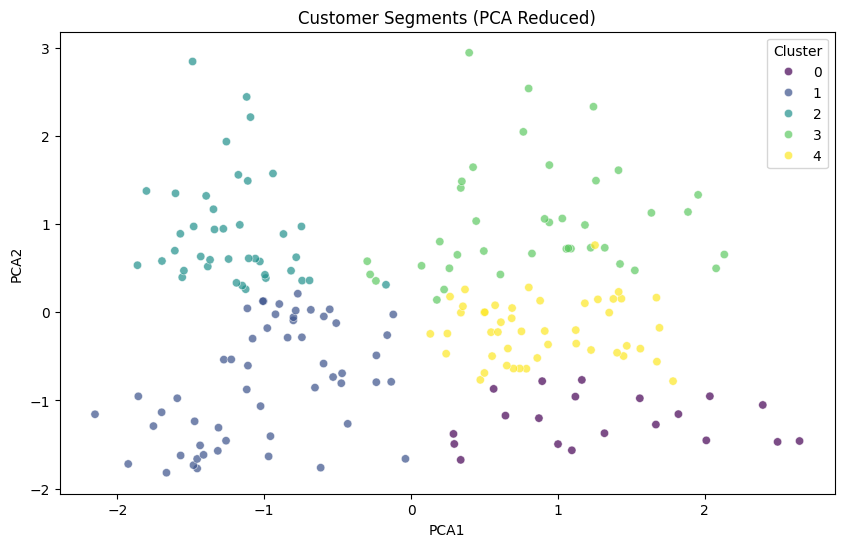

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('Customer Segments (PCA Reduced)')
plt.show()